In [1]:
import numpy as np

lines = []
width_array = []
height_array = [] 
class_array = []

count = 0
with open('sample_coco.txt') as f:
    lines = f.readlines()   
    for l in lines:
        words = l.split(",")
        
        image_height = int(words[1].split(":")[1])
        image_width = int(words[2].split(":")[1])
        class_id = int(words[0].split(":")[1])

        top_x = words[3]
        top_y = words[4]
        roi_height = int(words[5])
        roi_width = int(words[6].split("]")[0])

        heightN = roi_height/image_height
        widthN = roi_width/image_width
        
        height_array.append(np.log10(heightN))
        width_array.append(np.log10(widthN))
        class_array.append(class_id)
        
print("total number of data points : ", len(class_array))
number_of_classes = np.unique(class_array)
print("total number of classes : ", len(number_of_classes))
print(number_of_classes)

total number of data points :  10105
total number of classes :  80
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


In [2]:
from sklearn.cluster import KMeans

k = 6

X = np.zeros([len(height_array),2])

for index in range(len(height_array)):
    X[index][0] = width_array[index]
    X[index][1] = height_array[index]
    
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[-0.29098514 -0.70207372]
 [-0.38862286 -0.41246203]
 [-1.05053163 -0.25066144]
 [-0.66615814 -0.29743601]
 [-0.77313711 -0.76194629]
 [-0.25206437 -1.06524755]]
[3 5 3 ... 1 3 1]


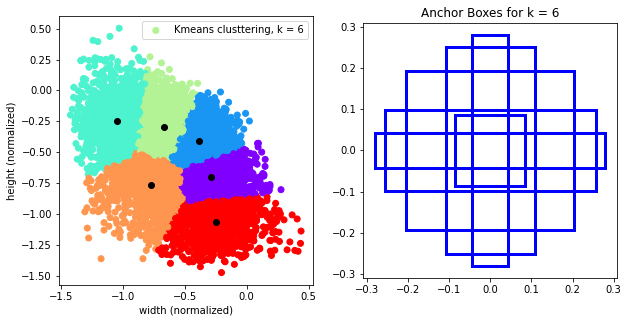

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(1,2, figsize=(10,10))

axs[0].scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow',label='Kmeans clusttering, k = 6')
axs[0].scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
axs[0].set_xlabel("width (normalized)")
axs[0].set_ylabel("height (normalized)")
axs[0].legend(loc="upper right")
axs[0].set_aspect('equal', 'box')

axs[1].plot([0, 0],[0, 0])

anchor_boxes_dims = np.power(10,kmeans.cluster_centers_)
for x,y in anchor_boxes_dims:
    px = -x/2
    py = -y/2
    ht = y
    wd = x    
    #add rectangle to plot
    axs[1].add_patch(Rectangle((px, py), wd, ht,fill=False, color = 'blue' ,lw=3))
    axs[1].set_aspect('equal', 'box')
    
plt.title("Anchor Boxes for k = 6")
plt.savefig('anchor_box.jpg', bbox_inches='tight')